In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from time import time

In [2]:
from sklearn.datasets import *
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [3]:
print(df.columns)
df.head()
df.shape

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


(150, 5)

In [4]:
features = df.columns[0:4] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

In [5]:
#ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [6]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_


array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [7]:
pcaDF = pd.DataFrame({"pc": range(1,5),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.729624,0.729624
1,2,0.228508,0.958132
2,3,0.036689,0.994821
3,4,0.005179,1.000000


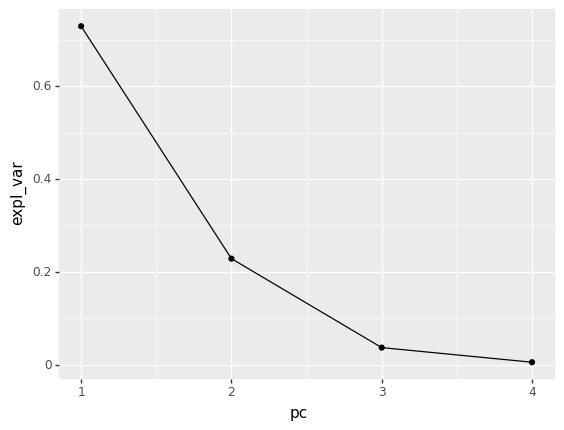

<ggplot: (19926471)>

In [8]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

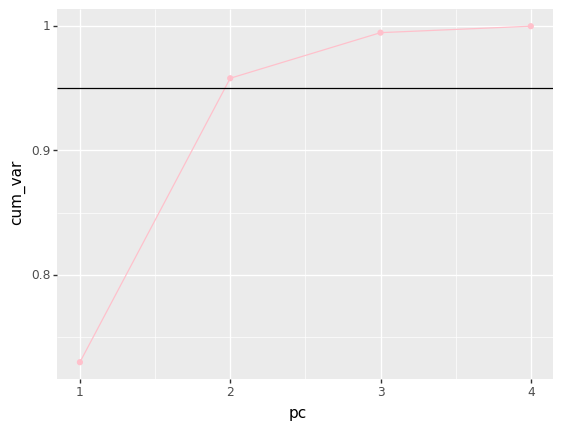

<ggplot: (20577377)>

In [9]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [10]:
data = pca.transform(df[features])
df2 = pd.DataFrame(data[:,0:2])


df4 = pd.DataFrame(data[:, 0:4])

#modeMod1
t0 = time()
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))
t1 = time()
#modeMod1

lr2 = LogisticRegression()
lr2.fit(df4, df["target"])
print("4 PCs:   ", lr2.score(df4, df["target"]))

#modeMod1
t2 = time()
lr3 = LogisticRegression()
lr3.fit(df2, df["target"])
print("2 PCs:    ", lr3.score(df2, df["target"]))
t3 = time()

print ('\nall data takes %f' %(t1-t0))
print ('PCA takes %f' %(t3-t2))

all data:  0.9733333333333334
4 PCs:    0.9733333333333334
2 PCs:     0.9333333333333333

all data takes 0.041002
PCA takes 0.020000
